<a href="https://colab.research.google.com/github/redjules/dogs-vs-cats-classification/blob/main/dogs_vs_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the dependencies

In [56]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
#configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from *Kaggle*

In [58]:
#kaggle api
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [59]:
!ls

 dogs-vs-cats.zip   kaggle.json   sampleSubmission.csv	 train
'image resized'     sample_data   test1.zip		 train.zip


In [60]:
#extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [61]:
#extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [62]:
import os
#counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing the name of images

In [63]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.10919.jpg', 'dog.11251.jpg', 'dog.9949.jpg', 'cat.1506.jpg', 'dog.7432.jpg', 'dog.5162.jpg', 'dog.11697.jpg', 'dog.2446.jpg', 'cat.1615.jpg', 'dog.5418.jpg', 'dog.11166.jpg', 'dog.1858.jpg', 'dog.2048.jpg', 'dog.718.jpg', 'cat.10126.jpg', 'dog.5436.jpg', 'cat.8467.jpg', 'dog.10817.jpg', 'dog.11059.jpg', 'cat.12404.jpg', 'dog.10163.jpg', 'dog.4148.jpg', 'cat.9389.jpg', 'dog.11925.jpg', 'cat.5405.jpg', 'dog.6716.jpg', 'cat.4459.jpg', 'cat.9556.jpg', 'dog.5287.jpg', 'dog.9849.jpg', 'cat.8613.jpg', 'cat.3119.jpg', 'cat.9399.jpg', 'dog.8444.jpg', 'dog.11619.jpg', 'cat.2005.jpg', 'dog.9055.jpg', 'dog.4561.jpg', 'cat.6019.jpg', 'cat.9775.jpg', 'dog.11946.jpg', 'dog.680.jpg', 'dog.12268.jpg', 'dog.2526.jpg', 'cat.5158.jpg', 'dog.6405.jpg', 'dog.4498.jpg', 'dog.3523.jpg', 'dog.10831.jpg', 'dog.6067.jpg', 'dog.5329.jpg', 'dog.7413.jpg', 'dog.494.jpg', 'cat.3171.jpg', 'cat.2073.jpg', 'dog.1859.jpg', 'dog.9927.jpg', 'cat.3300.jpg', 'cat.6654.jpg', 'cat.7472.jpg', 'cat.8071.jpg', 'dog.3081.jp

Importing the Dependencies

In [64]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

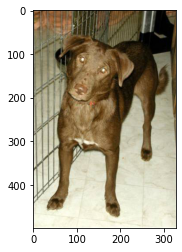

In [83]:
#display dog image
img = mpimg.imread('/content/train/dog.1.jpg')
imgplt = plt.imshow(img)
plt.show()

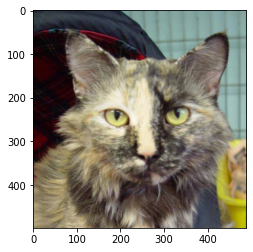

In [86]:
#display dog image
img = mpimg.imread('/content/train/cat.10.jpg')
imgplt = plt.imshow(img)
plt.show()

In [67]:
file_names = os.listdir('/content/train/')
for i in range(5):

  name = file_names[i]
  print(name[0:3])

dog
dog
dog
cat
dog


In [74]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]
  if name == 'dog':
    dog_count += 1
  
  else:
    cat_count += 1


print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images

In [69]:
#creating a directory for resized images
path = '/content/image resized'

if (not os.path.exists(path)):  # Prevent error if folder already exists
  os.mkdir(path)

In [70]:
for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = os.path.join('/content/train', filename)

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = os.path.join('content/image resized', filename)
  img.save(newImgPath)

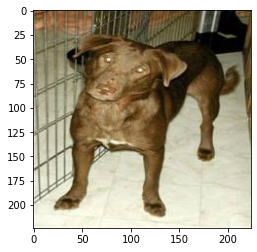

In [79]:
#display resized dog image
img = mpimg.imread('/content/image resized/dog.1.jpg')
imgplt = plt.imshow(img)
plt.show()

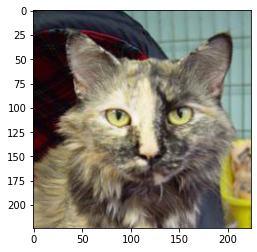

In [85]:
#display resized dog image
img = mpimg.imread('/content/image resized/cat.10.jpg')
imgplt = plt.imshow(img)
plt.show()

Creating labels for resized images of dogs and cats

Cat-->0

Dog-->1

In [89]:
#creating a for loop to assign labels
filenames = os.listdir('/content/image resized')

labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [91]:
print(filenames[0:5])
print(len(filenames))

['dog.10919.jpg', 'dog.11251.jpg', 'dog.9949.jpg', 'cat.1506.jpg', 'dog.7432.jpg']
2000


In [92]:
print(labels[0:5])
print(len(labels))

[1, 1, 1, 0, 1]
2000


In [94]:
#counting the images of dogs and cats out of 2000  counts
values, counts = np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[ 996 1004]


Converting all the resized images to nump arrays

In [95]:
import cv2
import glob

In [103]:
image_directory = '/content/image resized/'
image_extension = ['png','jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [106]:
print(dog_cat_images[0]) # Print the first image as an np array of pixels

[[[  3   0  15]
  [  3   0  15]
  [  1   0  16]
  ...
  [ 41  45  50]
  [ 41  45  50]
  [ 41  45  50]]

 [[  3   0  15]
  [  3   0  15]
  [  1   0  16]
  ...
  [ 42  46  51]
  [ 41  45  50]
  [ 41  45  50]]

 [[  2   2  16]
  [  2   2  16]
  [  2   1  17]
  ...
  [ 42  46  51]
  [ 42  46  51]
  [ 41  45  50]]

 ...

 [[179 154 134]
  [178 153 133]
  [176 151 131]
  ...
  [155 120  94]
  [159 120  92]
  [164 125  97]]

 [[175 150 130]
  [179 154 134]
  [178 153 133]
  ...
  [149 114  88]
  [150 111  83]
  [158 119  91]]

 [[170 145 125]
  [176 151 131]
  [176 151 131]
  ...
  [156 121  95]
  [150 111  83]
  [155 116  88]]]


In [101]:
type(dog_cat_images)

numpy.ndarray

In [104]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [107]:
X = dog_cat_images
Y = np.asarray(labels)

##Train Test Split

In [108]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [109]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400--> test images

In [112]:
#scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [113]:
print(X_test_scaled)

[[[[0.36078431 0.45490196 0.47843137]
   [0.47843137 0.57254902 0.59607843]
   [0.6        0.69019608 0.72156863]
   ...
   [0.6        0.70196078 0.76470588]
   [0.46666667 0.55686275 0.61568627]
   [0.06666667 0.15686275 0.21568627]]

  [[0.56862745 0.67058824 0.69411765]
   [0.61176471 0.71372549 0.7372549 ]
   [0.63529412 0.7372549  0.76078431]
   ...
   [0.60392157 0.70588235 0.76862745]
   [0.47058824 0.56078431 0.61960784]
   [0.0745098  0.16470588 0.22352941]]

  [[0.63921569 0.76078431 0.77254902]
   [0.61960784 0.74117647 0.75294118]
   [0.58823529 0.70196078 0.71764706]
   ...
   [0.60392157 0.70588235 0.76862745]
   [0.47843137 0.56862745 0.63137255]
   [0.08627451 0.17647059 0.23921569]]

  ...

  [[0.51764706 0.5372549  0.53333333]
   [0.51372549 0.53333333 0.52941176]
   [0.5254902  0.54509804 0.54117647]
   ...
   [0.85098039 0.85098039 0.85098039]
   [0.83921569 0.83921569 0.83921569]
   [0.83137255 0.83137255 0.83137255]]

  [[0.51764706 0.54117647 0.5372549 ]
   [0.5

Building the Neural Network

In [114]:
import tensorflow as tf
import tensorflow_hub as hub

In [115]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [116]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
  
])

model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [117]:
model.compile(
    
    optimizer = 'adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [118]:
model.fit(X_train_scaled,Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 74s 1s/step - loss: 0.2314 - acc: 0.8944
Epoch 2/5
50/50 [==============================] - 65s 1s/step - loss: 0.0710 - acc: 0.9769
Epoch 3/5
50/50 [==============================] - 64s 1s/step - loss: 0.0532 - acc: 0.9819
Epoch 4/5
50/50 [==============================] - 65s 1s/step - loss: 0.0385 - acc: 0.9906
Epoch 5/5
50/50 [==============================] - 65s 1s/step - loss: 0.0302 - acc: 0.9937


In [119]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 16s 1s/step - loss: 0.0337 - acc: 0.9900
Test Loss = 0.03373454883694649
Test Accuracy = 0.9900000095367432


**Predictive System**

Path pf the image to be predicted: /cat2.jpg


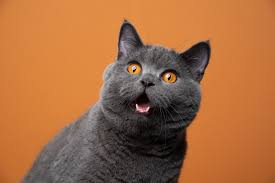

1/1 [==============================] - 0s 75ms/step
The image represents a Cat


In [130]:
input_image_path = input('Path pf the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled,[1,224,224,3])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')
  
